In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Kobe Bryant  shot selection

Cсылка на соревнование: https://www.kaggle.com/c/kobe-bryant-shot-selection

Goal: Fun and education

Using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

Ссылка на соревнование: https://www.kaggle.com/c/kobe-bryant-shot-selection

Цель: развлечение и образование

Используя данные о взмахах и промахах Коби за 20 лет, можете ли вы предсказать, какие удары попадут в сетку? Этот конкурс хорошо подходит для отработки основ классификации, разработки признаков и анализа временных рядов. Практика принесла Кобе восьмизначный контракт и 5 чемпионских перстней. Что это даст вам?

Эти данные содержат местонахождение и обстоятельства каждого броска с игры, который Коби Брайант забил за свою 20-летнюю карьеру. Ваша задача — предсказать, вошла ли корзина (shot_made_flag).

Мы удалили 5000 флагов shot_made_flags (представленных как отсутствующие значения в CSV-файле). Это снимки тестового набора, для которых вы должны отправить прогноз. Вам предоставляется образец файла отправки с правильными shot_ids, необходимыми для действительного прогноза.

In [5]:
data = pd.read_csv('kobe.csv')

In [ ]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [ ]:
target = 'shot_made_flag'

**Задания:**

1. Провести анализ данных. Много хороших примеров анализа можно посмотреть здесь https://www.kaggle.com/c/kobe-bryant-shot-selection/kernels
2. Подготовить фичи для обучения модели - нагенерить признаков, обработать пропущенные значения, проверить на возможные выбросы, обработать категориальные признаки и др.
3. Обучить линейную модель, Lasso, Ridge (с встроеной регуляризацией) на тех же признаках - построить сравнительную таблицу или график коэффициентов, сделать заключения о том, как меняется величина коэффициентов, какие зануляются. 

**Дополнительно**
4. Сравнить результаты на тестовом наборе данных - сделать train_test_split в самом начале, подготовить переменные, сравнить результаты работы классификаторов (те же 3), метрика ROC AUC
5. Построить PCA на подготовленных признаках, посмотреть, какие компоненты составляют наибольшую часть дисперсии целевой переменной

In [8]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import seaborn as sns
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
%matplotlib inline

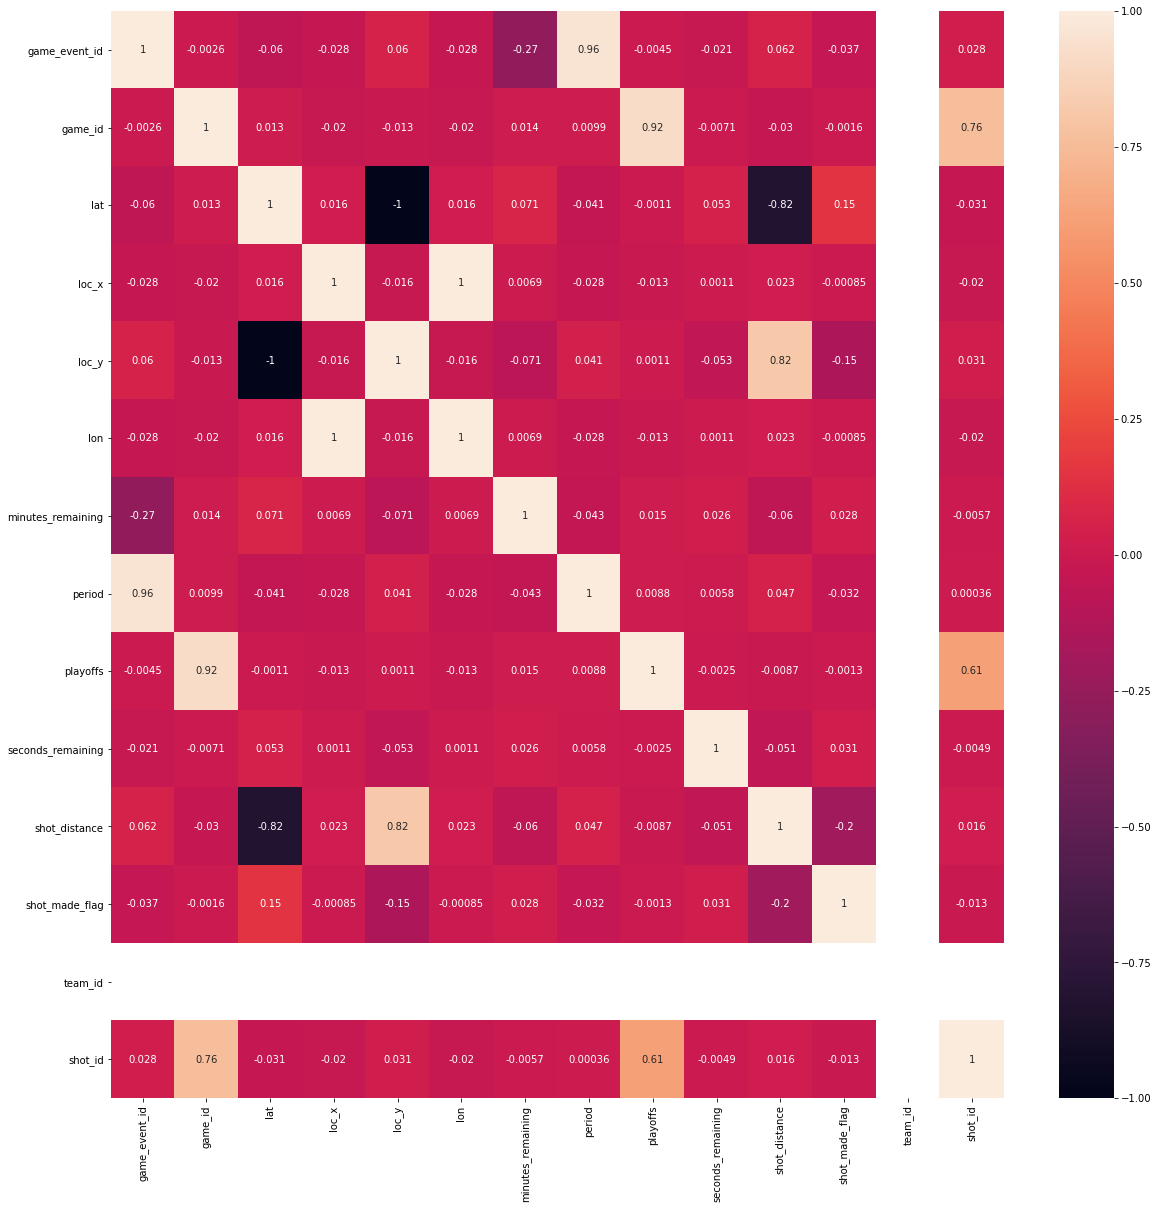

In [10]:
corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

In [25]:
cols = data.columns
for c in range(len(cols)):
    print(c, cols[c])

0 action_type
1 combined_shot_type
2 game_event_id
3 game_id
4 lat
5 loc_x
6 loc_y
7 lon
8 minutes_remaining
9 period
10 playoffs
11 season
12 seconds_remaining
13 shot_distance
14 shot_made_flag
15 shot_type
16 shot_zone_area
17 shot_zone_basic
18 shot_zone_range
19 team_id
20 team_name
21 game_date
22 matchup
23 opponent
24 shot_id


In [37]:
# result = pd.concat([df1, df4], axis=1, join="inner")
df1 = data[data.columns.drop('shot_made_flag')]
df2 = data[['shot_made_flag']]
data = pd.concat([df1, df2], axis=1, join="inner")

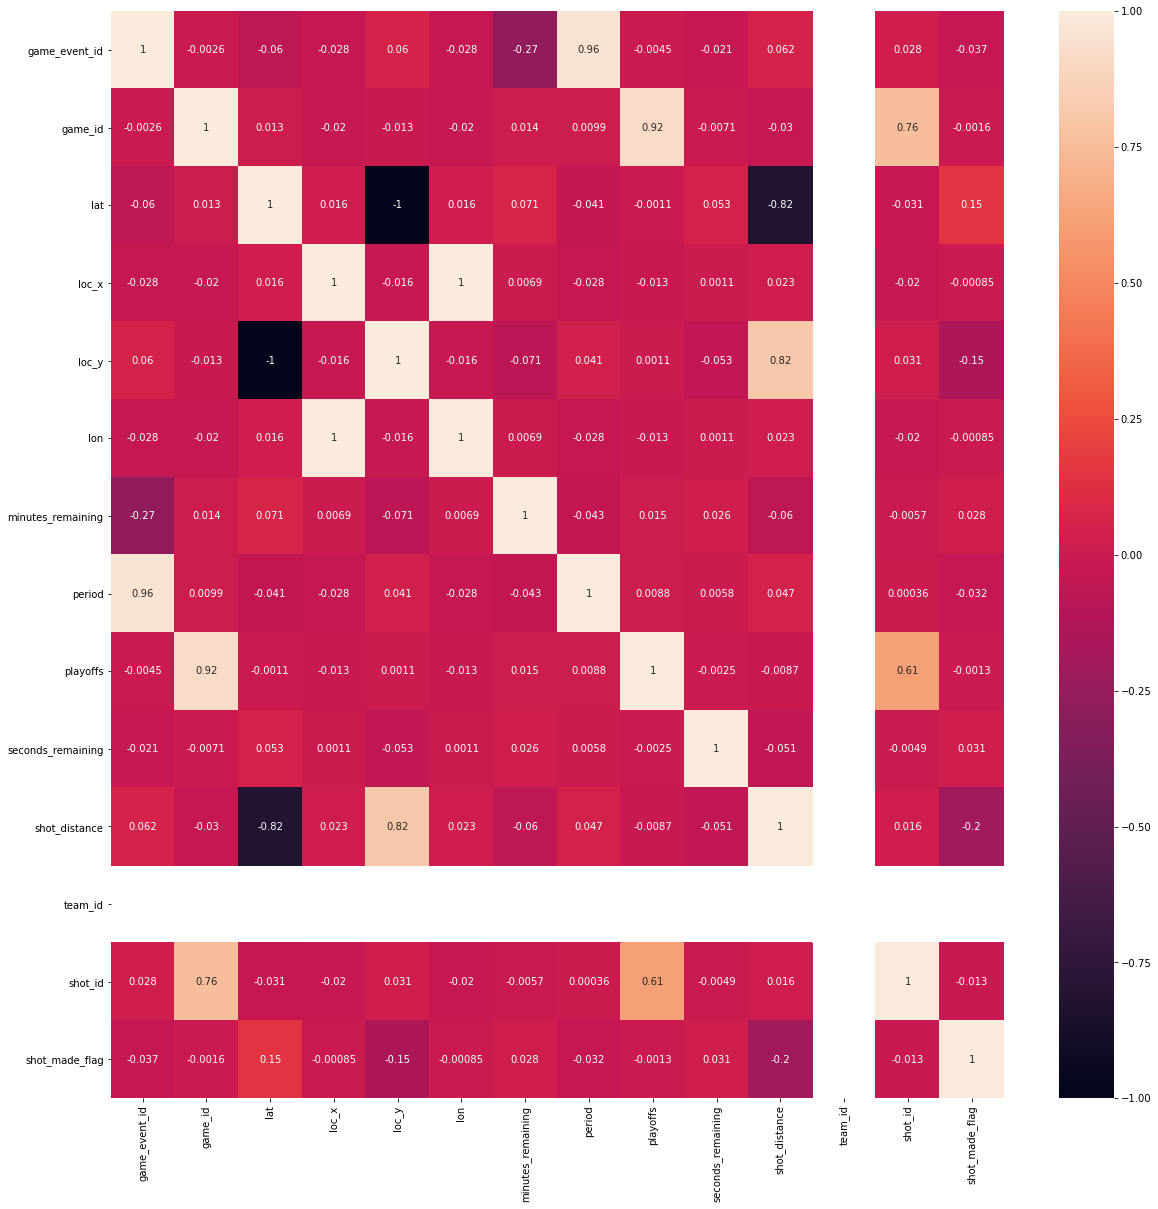

In [39]:
corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

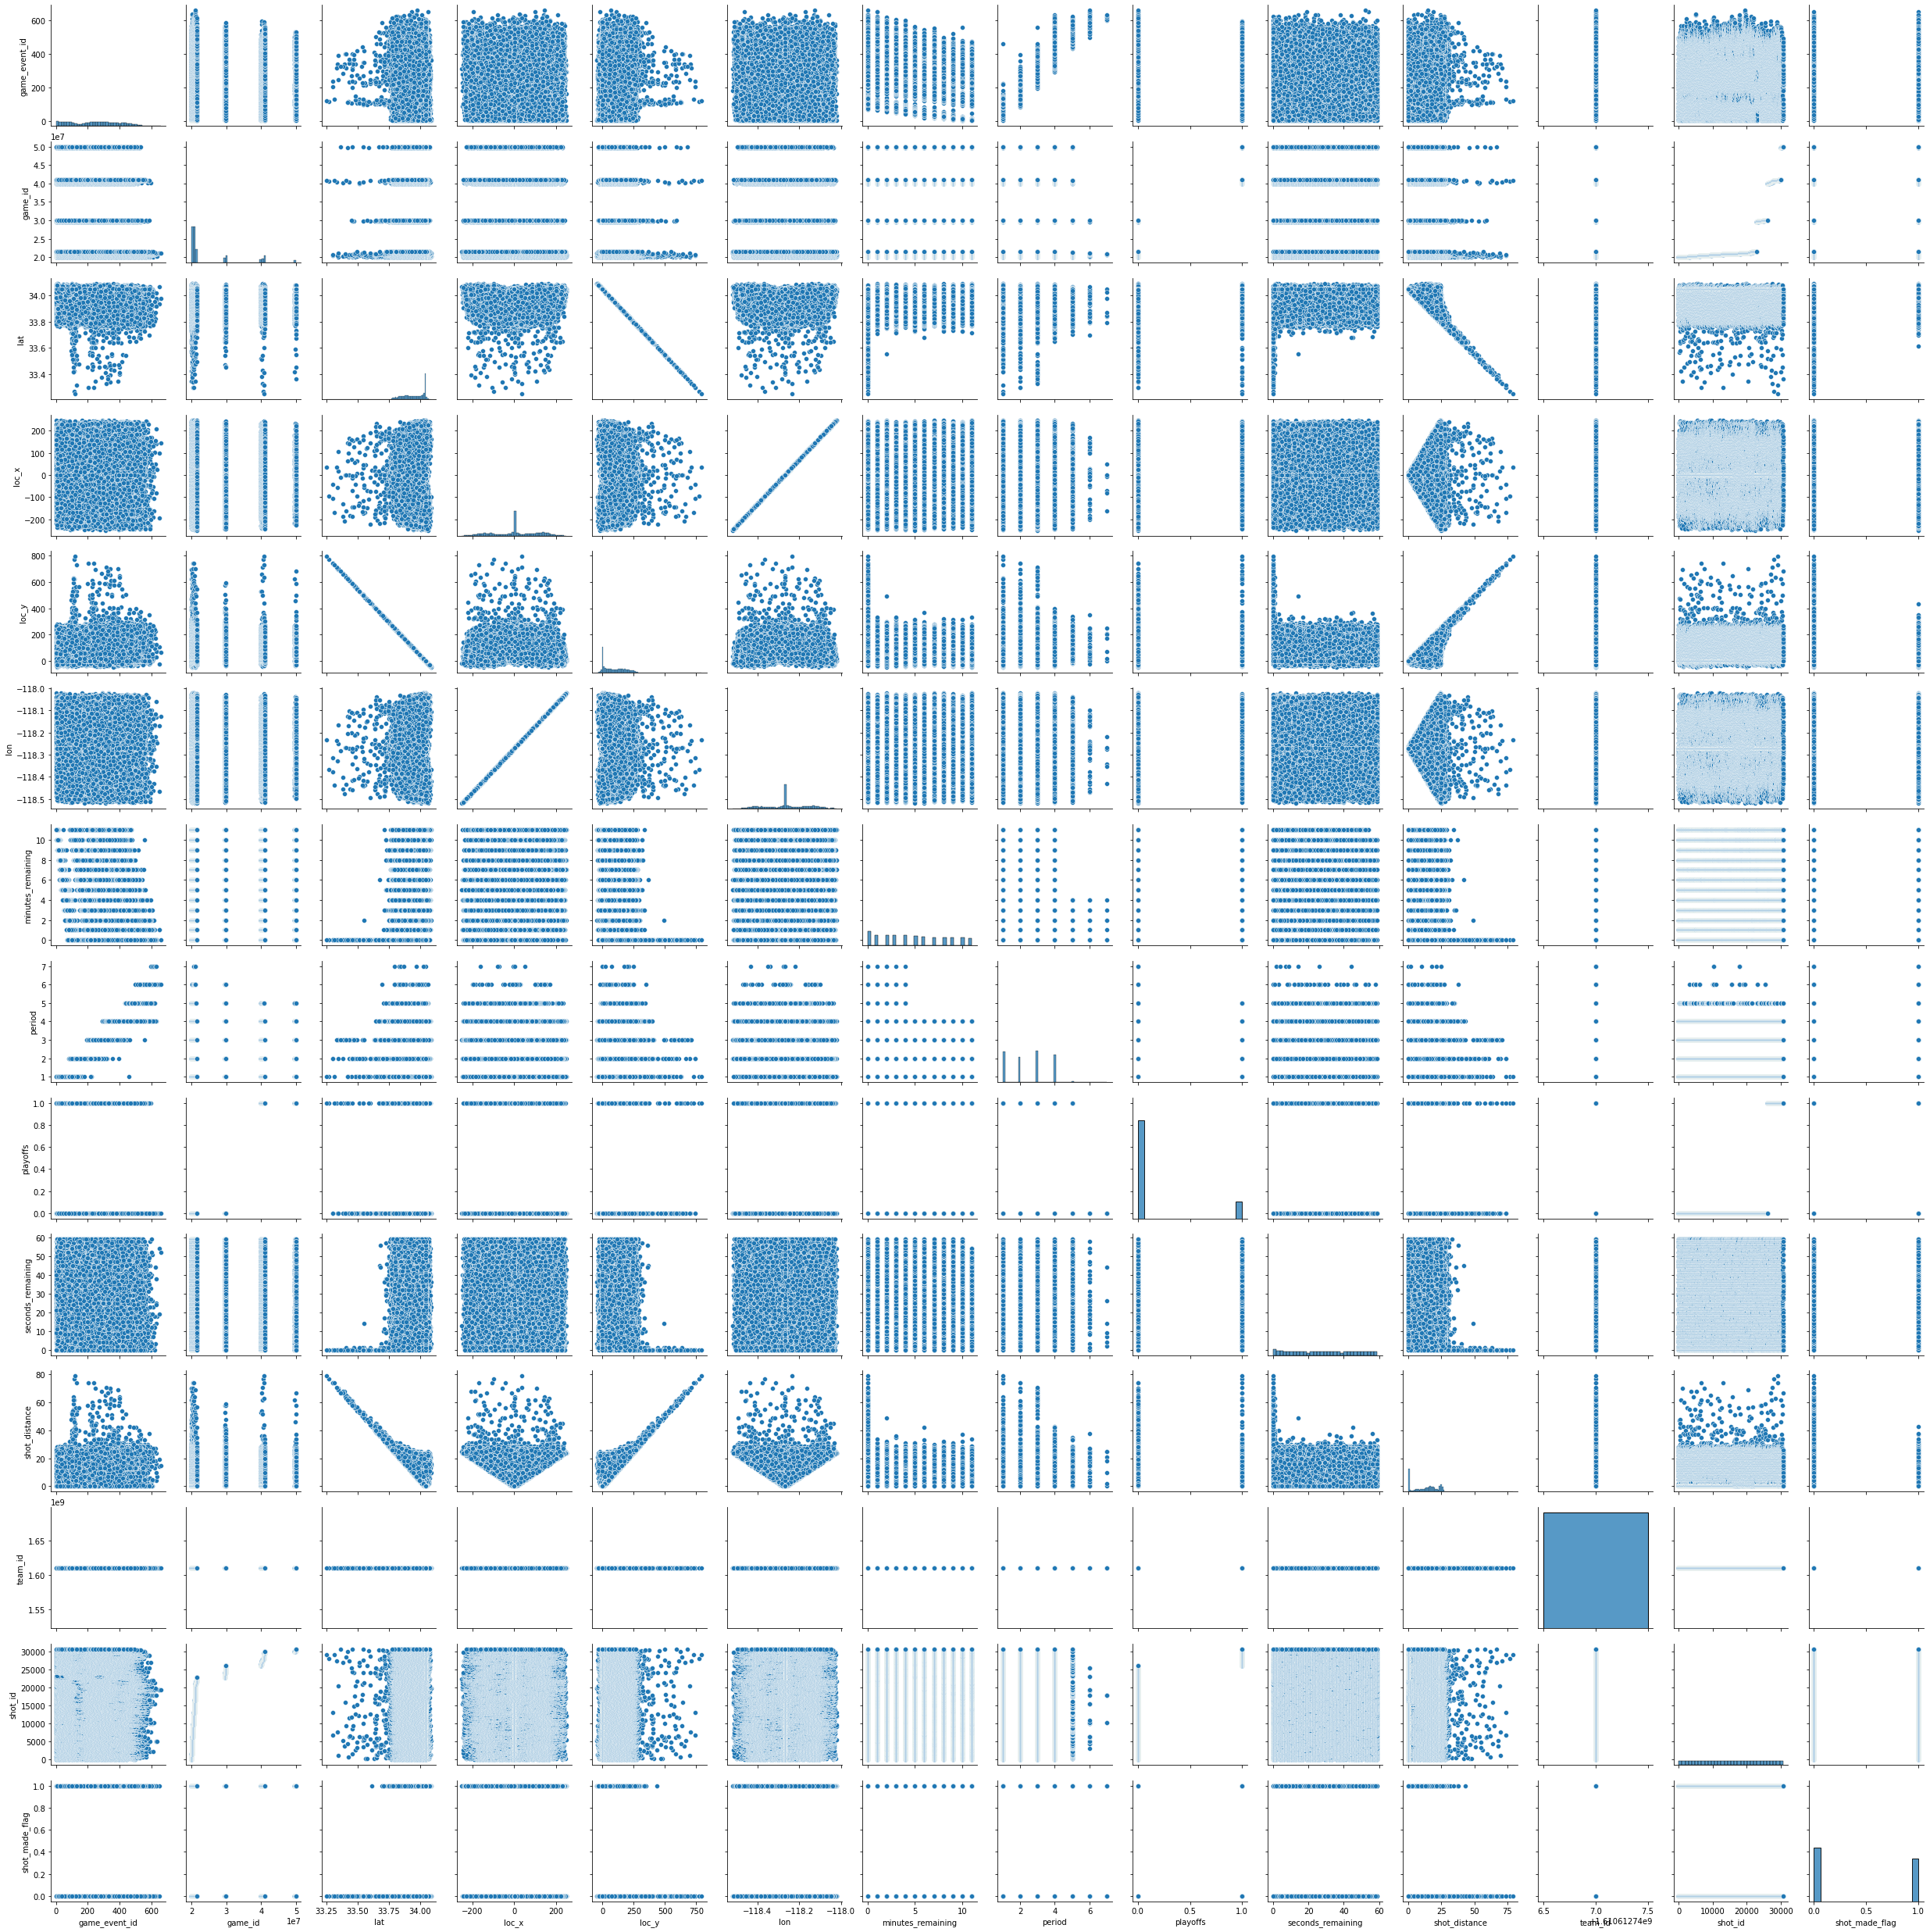

In [40]:
sns.pairplot(data)

In [42]:
# X = array[:,0:8]
# Y = array[:,8]
# # feature extraction
# model = ExtraTreesClassifier()
# model.fit(X, Y)
# for i in range(len(names)-1):
#   print(f"{names[i]}\t- {model.feature_importances_[i]:.4f}")
X = data[data.columns.drop('shot_made_flag')]
Y = data[['shot_made_flag']]

In [46]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesClassifier()
# model.fit(X, Y)